# Project 03: Chain Reaction
**Name:** Pranav Advani

You have been transported back in time (again!) this time to Enrico Fermi's office at the University of Chicago in 1942. Fermi is hard at work trying to build the first self-sustaining artificial nuclear reaction using Uranium 235. Once he calms down from the shock of witnessing time travel, Fermi has asked for your help to explore how factors such as size, shape and purity impact the ability of a sample of Uranium 235 to sustain a chain reaction.  

Fermi initially presents you with his simplest model to help make it easy to troubleshoot and confirm the results from the Monte Carlo simulation that you will build of this chain reaction process. In this model, when a $^{235}U$ nucleus undergoes nuclear fission, it always releases two thermal neutrons, where a thermal neutron is one that is moving slowly enough to possibly be captured by other $^{235}U$ nuclei. These thermal neutrons will travel an average distance, known as the Mean Free Path $λ$, before being captured elsewhere in the sample. The probability of a thermal neutron being captured when it travels a distance $L$ is given by $p(L)∝e^{-L/λ}$. In this model, every captured thermal neutron results in an unstable $^{235}U$ nucleus which will almost immediately undergo its own fission process, releasing further neutrons, and possibly sustaining a chain reaction if enough of the neutrons are being captured inside the $^{235}U$ sample. You and Fermi have decided that a Monte Carlo process would be the best way to simulate this.

# Background and Motivation

The mean free path of the thermal neutrons is the average distance a thermal neutron travels. The mean free path of the neutrons can change as a function of the neutron moderator in the system. Varying the mean free path of the thermal neutrons would provide insight as to how the multiplication factor depends on the mean free path. An inference I would have would be that the smaller the mean free path, the greater the multiplication factor because the thermal neutrons, on average, travel a smaller distance and have less of a chance to be found outside the sample. I would then like to see whether increasing the volume of the sample would have an affect on the multiplication factor at a relatively low mean free path. This would be interesting to research as it will provide insight as to whether the neutron medium affects the multiplication factor more than the volume of the sample or vice versa. 


**2 Research Questions** 

1. How does varying the mean free path affect the multiplication factor
2. Assuming that the multiplication factor increases with a smaller mean free path, would increasing the volume have a considerable affect on the multiplication factor as the neutrons are already moving a a smaller distance on average?

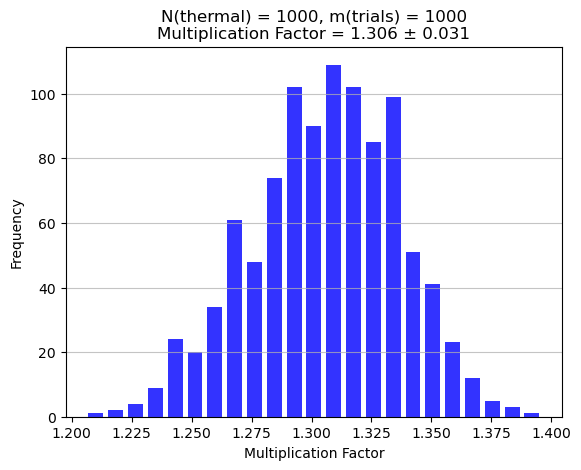

In [1]:
# Characterizing the System Code

# 1. Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def fission(N, lamda=0.15, a=0.50):
# function consumes initial number of thermal neutrons (N), 
# mean free path (lamda = 0.15 m) (Fermi's best guess of the mean free path based on the neutron cross section in U235), 
# and a side length of the cube used to find the volume of the sample (a=0.50 m)
# function produces a multiplication factor

    
    # the probability that an absorbed neutron fisses
    p = 1
    
    # average number of thermal neutron according the Fermi
    N_themal_avg = 2.4355

    # Generate a random initial decay position for each neutron
    x0 = a*(np.random.random(N)-.5)
    y0 = a*(np.random.random(N)-.5)
    z0 = a*(np.random.random(N)-.5)

    # Generate random initial directions for each neutron
    phi = 2*np.pi*(np.random.random(N))
    cos = 2*(np.random.random(N)-.5)
    theta =  np.arccos(cos)

    # Generate random distances travelled
    L = -lamda*np.log(np.random.random(N))
    
    # Determine final positions of the neutrons
    xf = x0 + L*np.sin(theta)*np.cos(phi)
    yf = y0 + L*np.sin(theta)*np.sin(phi)
    zf = z0 + L*cos
    
    # Determining how many neutrons stay in sample
    xin = np.abs(xf) < a/2
    yin = np.abs(yf) < a/2
    zin = np.abs(zf) < a/2
    xyin = np.logical_and(xin, yin)
    xyzin = np.logical_and(zin, xyin)
    
    # Finding the total number of neutrons absorbed -> based on staying "in" all 3 dimensions
    N_sorbed = xyzin.sum()
    
    # Determining number of fission reactions based on what was absorbed
    N_fissed = np.sum(np.random.rand(N_sorbed)<p)
    
    N_new = 2 * N_fissed
    
    f = N_new/N
    
    return f

def certainty(N, m_trials, lamda=0.15, a=0.50):
# function consumes an initial number of thermal neutron (N), number of trials (m_trials), and a 
# mean free path (lamda = 0.15 m)
# function produces multiplication factor, mean multiplication factor, and standard deviation of the 
# multiplication factor
    
    # create an array for the multiplication factors to cycle through
    mult_fact = np.zeros(m_trials)
    
    # for loop to find the multiplication for every element in the array above
    for n in range (len(mult_fact)):
        mult_fact[n] = fission(N, lamda, a)
    # find the mean of the multiplication factor
    mean_fact = mult_fact.mean()
    # find the standard deviation of the multiplication factor
    std_fact = mult_fact.std(ddof=1)
    
    return mult_fact, mean_fact, std_fact

def fission_gram(mult_fact, mean_fact, std_fact):
    
    # plotting code for the histogram
    plt.hist(mult_fact, bins='auto', color='blue', alpha=0.8, rwidth=0.75)
    plt.xlabel("Multiplication Factor")
    plt.ylabel("Frequency")
    plt.title(f"N(thermal) = 1000, m(trials) = 1000\nMultiplication Factor = {mean_fact:.3f} ± {std_fact:.3f}")
    plt.grid(axis='y', alpha=0.75)
    plt.show()
    


# Defining necessary constants
N = 1000 # Initial number of thermal neutrons
m_trials = 1000 # number of trials run

# creating the data for the plot
mult_fact, mean_fact, std_fact = certainty(N, m_trials) 

# Creating a histogram for the data 
fission_gram(mult_fact, mean_fact, std_fact)


After playing around with this characterisation code and the number of initial particles and number of trials, I have found that having 100 particles and only 100 trials provides a relatively precise picture of the multiplication factor with minimal error. 

# Methodology and computational code:

In order to find the answers to my research questions, I will be using my fission and certainty functions in the characterisation part of the project to generate phase space diagrams to answer my research questions. I will create a new function that will be used to vary the mean free path of the thermal neutrons at some fixed volume creating a phase space diagram. This phase space diagram will provide some insight as to how the mean free path affects the multiplication factor. Another function will be used to vary the volume of the sample at some fixed mean free path creating another phase space diagram showing the relationship between volume of the sample and the multiplicaiton factor. I will the use another function to plot the phase space diagrams in the form of subplots. I plan on creating the functions that vary the mean free path and the volume to have the option to fix the volume and mean free path at some value respectively. This will provide some insight in the relationship between the volume and the mean free path and how much of an affect they have on the multiplication factor with respect to each other.

In [2]:
def volume_variance(N, m_trials, lamda=0.00001):
    
# function used to vary the volume of the sample by varying the side length of the box at a fixed mean free path
    side_lengths = np.linspace(0.1, 10, m_trials)
    mult_fact = []
    mean_fact = []
    std_fact = []
    for a in side_lengths:
        output = certainty(N, m_trials, lamda, a)        
        mult_fact.extend(output[0])
        mean_fact.append(output[1])
        std_fact.append(output[2])
    return mult_fact, side_lengths, mean_fact, std_fact

def lamda_variance(N, m_trials, a=0.50, final=1):
    
# function used to vary the mean free path of the neutrons at some fixed volume
    lamda = np.linspace(0.00001, final, m_trials)
    mult_fact = []
    mean_fact = []
    std_fact = []
    for l in lamda:
        output = certainty(N, m_trials, l, a)        
        mult_fact.extend(output[0])
        mean_fact.append(output[1])
        std_fact.append(output[2])
    return mult_fact, lamda, mean_fact, std_fact

def plot_it2(lamda, mean_fact_lamda, std_fact_lamda, side_length, mean_fact_a, std_fact_a):
    
    plt.figure(figsize=(8, 10))
# function plots the data produced by lamda_variance and volume_variance
    plt.subplot(2,1,1)    
    plt.errorbar(lamda, mean_fact_lamda, yerr=std_fact_lamda, fmt='o', markersize=4, capsize=5, label='Mean Multiplication Factor')
    plt.xlabel("Mean Free Path [meters]")
    plt.ylabel("Multiplication Factor")
    plt.title("Multiplication Factor as a Function of Mean Free Path")
    plt.grid('equal', alpha=0.75)
    
    plt.subplot(2,1,2)    
    plt.errorbar(side_length, mean_fact_a, yerr=std_fact_a, fmt='o', markersize=4, capsize=5, label='Mean Multiplication Factor')
    plt.xlabel("Side Length of Cube [meters]")
    plt.ylabel("Multiplication Factor")
    plt.title("Multiplication Factor as a Function of Volume at a Fixed Mean-Free Path")
    plt.grid('equal', alpha=0.75)
    plt.tight_layout()
    plt.show()
    
N = 1000
m_trials = 100

# Error testing

In order to check whether there are any errors in the physics I am simulating, I will be error testing 2 parts of the code:

    1. The expected relationship between varying the mean free path and the multiplication factor
        - by extension I will also be showing that the maximum multiplication factor is 2
    2. The expected relationship between varying the volume of the system, at some fixed mean free path, and the multiplication factor 
I will then produce a plot proving the claims I make in the cell below.

1. The expected relationship between varying the mean free path and the multiplication factor

The relationship between the probability of the thermal neutron being captured and the mean free path is given by, 
$$p(L)∝e^{-L/λ}$$
where $L$ is the distance travelled by the thermal neutron, $\lambda$ is the mean distance travelled by the thermal neutrons. This is a probability distribution that is an exponential decay. While this proportionality shows the relationship between the mean free path and the probability of the thermal neutron being captured, the probability of the thermal neutron being captured is linearly proportional to the multiplication factor. This is because the if the thermal neutron is captured, it results in 2 new thermal neutrons being produced which determines the multiplication factor. So if the probability of the thermal neutrons being captured decreases, then the multiplication factor will also, proportionally, decrease. This linear relationship will also be proved if the plot of the multiplication factor as a  function of the mean free path is exponential. When the the mean free path, $\lambda$, is less than 1, the rate of decay is much sharper and when the mean free path is greater than 1, the decay rate is not very sharp. The expected outcome from this would be that when the mean free path is approaching 0 the multiplication factor will increase exponentially peaking at 2.

    - Why is the maximum multiplication factor 2
    In physics terms, this makes sense because if the thermal neutrons were to travel $0m$ on average, all of the thermal neutrons would be still inside the sample. If each thermal neutron resulted in a fission reaction, the amount of thermal neutrons in the sample would be increased by a factor of 2. It is a factor of 2 because each fission reaction results in 2 thermal neutrons being produced. This is all based on the assumption that the probability of each thermal neutron in the sample resulting in fission is 
    
2. The expected relationship between varying the volume of the system, at some fixed mean free path, and the multiplication factor 

If the mean free path of the thermal neutrons is close to 0 $(1 \times 10^{-5} m)$, then increasing the volume of the sample will have negligible affect of the multiplicaton factor. This is because, if the thermal neutrons, on average, are travelling $10 \mu m$ from where they started in a given fission event, then the only way for the neutrons to be found outside the sample is if they were intially positioned at the edge of the sample. The probability of a significant amount (~ 100 thermal neutrons) of thermal neutrons being initally positioned at the edge of the sample is slim to none. Thus, increasing the volume does not have a significant affect on the multiplication factor when the mean free path is close to 0.

Let us now look at a couple of plots to check whether the physics discussed in this cell matches the simulation created. 

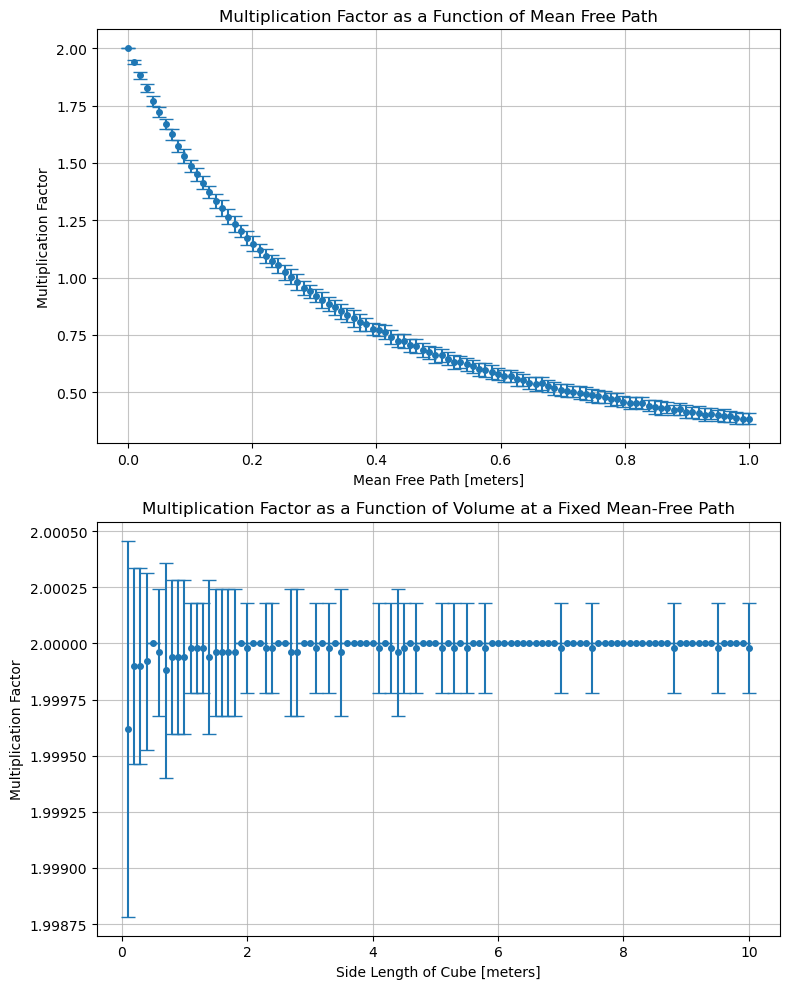

In [3]:
mult_fact_vv, lamda_vv, mean_lamda, std_lamda = lamda_variance(N, m_trials)
mult_fact_sl, side_lengths, mean_sl, std_sl = volume_variance(N, m_trials) 
plot_it2(lamda_vv, mean_lamda, std_lamda, side_lengths, mean_sl, std_sl)

1. The top plot shows an exponential decay curve where the multiplication factor increases exponentially when the mean free path approaches 0. This matches what we stated about the relationship between the multiplication factor and the mean free path. The plot looks like an exponential decay. This also proves that there is a linear relationship between the probability of the thermal neutrons being captured and the multiplication factor. We can also see, on the top plot, that when the mean free path is close to 0/approaching 0, the multiplication factor peaks at 2, just as what was predicted. 

2. The bottom plot shows the multiplication factor as a function of volume at a fixed mean free path of $\lambda = 1\times 10^{-5}m$. The plot shows that the the multiplication factor is negligibly affected by the variance in the volume. The uncertainties of each value is quite high, however, the variance is minimal. This goes to show that when the mean free path of the thermal neutrons is close to 0, varying the volume has a negligible affect on the multiplication factor. This is what we predicted.

# Data visualization, interpretation and presentation of results
_(This section should include code that produces your visualizations and any other aspects of your data or results that you would like to present. Make sure to provide caption-style summaries with everything presented in this section so that the reader can understand and correctly interpret your visualizations and presented results.)_

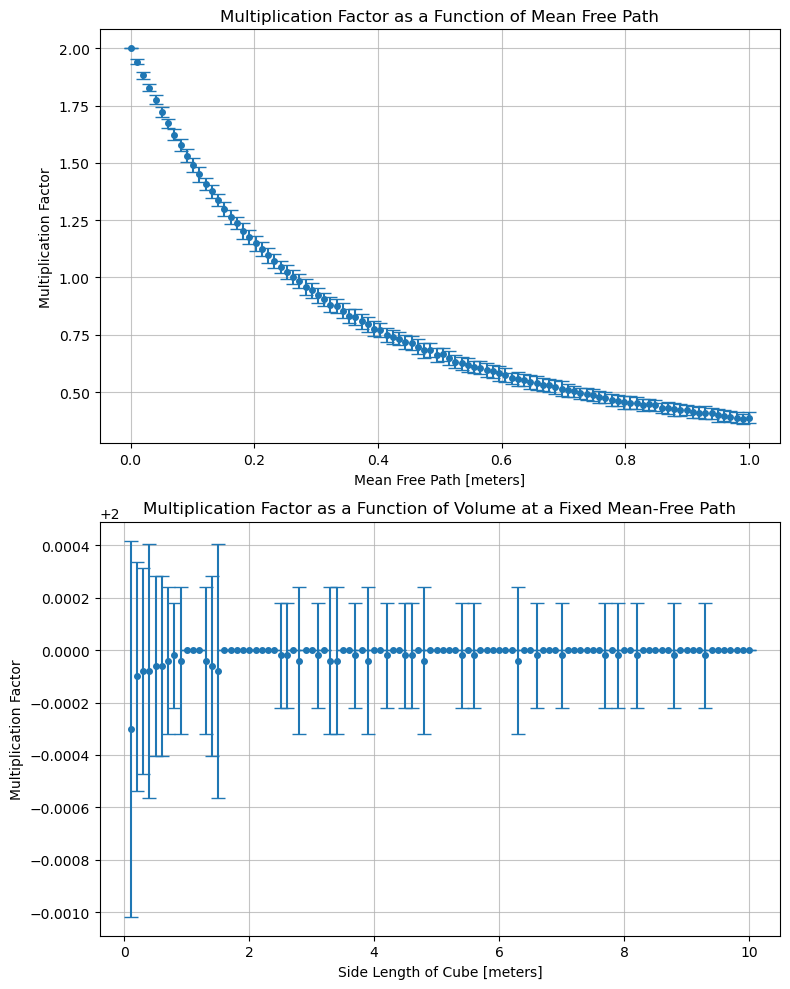

In [4]:
mult_fact_vv, lamda_vv, mean_lamda, std_lamda = lamda_variance(N, m_trials)
mult_fact_sl, side_lengths, mean_sl, std_sl = volume_variance(N, m_trials) 

plot_it2(lamda_vv, mean_lamda, std_lamda, side_lengths, mean_sl, std_sl)

_Figure 1: The top plot shows how the multiplication factors changes as a function of mean free path. The sidelength is fixed at 0.15 m. The data shows that there is an exponential relationship with the mean free path and the multiplication factor. Furthermore, the data shows that the multiplication factor increases as the mean free path decreases. The bottom plot shows how the multiplication factor changes as a function of volume of the sample. The sample is a cube. By varying the sidelength of the cube, the volume is varied. The mean free path is fixed at $\lambda = 1\times 10^{-5}m$. The data shows that increasing the volume has negligible affect on the multiplication factor._

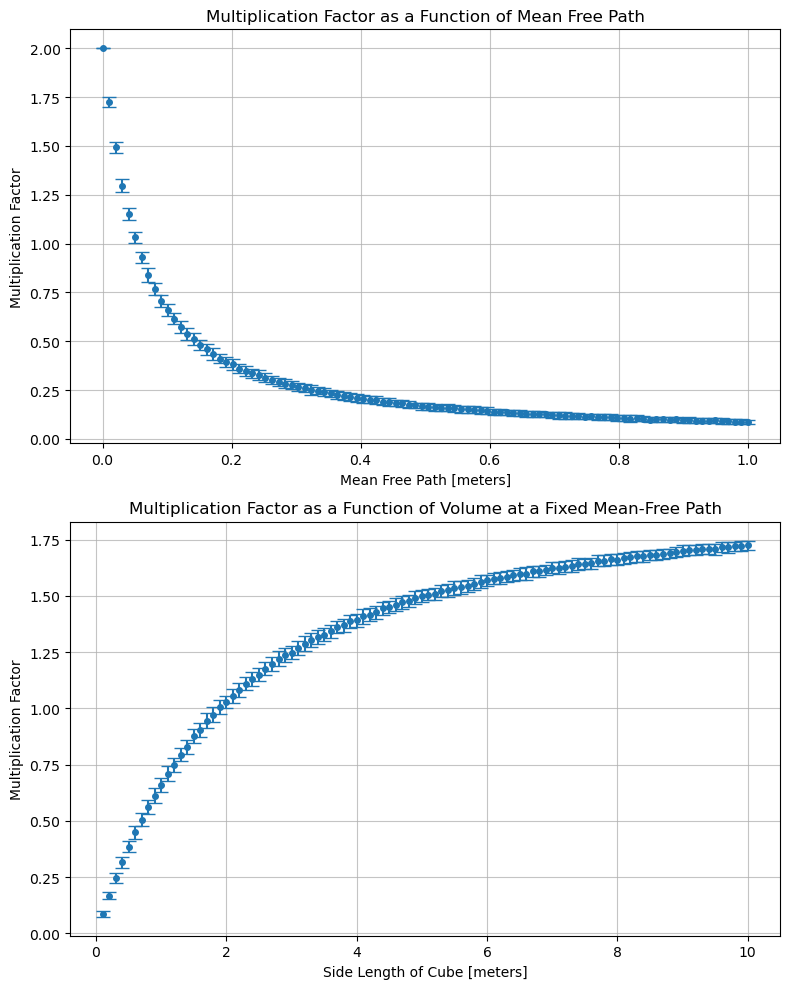

In [5]:
mult_fact_vv, lamda_vv, mean_lamda, std_lamda = lamda_variance(N, m_trials, 0.1)
mult_fact_sl, side_lengths, mean_sl, std_sl = volume_variance(N, m_trials, 1) 

plot_it2(lamda_vv, mean_lamda, std_lamda, side_lengths, mean_sl, std_sl)

_Figure 2: The top plot shows how the multiplication factors changes as a function of mean free path. The sidelength is fixed at 0.1 m. The data shows that there is an exponential relationship with the mean free path and the multiplication factor. Furthermore, the data shows that the multiplication factor increases as the mean free path decreases. The bottom plot shows how the multiplication factor changes as a function of volume of the sample. The sample is a cube. By varying the sidelength of the cube, the volume is varied. The mean free path is fixed at $\lambda = 1m$. The data shows that increasing the volume has a notable affect on the multiplication factor since the mean free path is relatively big compared to the volume of the cube. There seems to be a volume dependence on the multiplication factor. The data also shows a logarithmic relationship between the variance in volume and the multiplication factor._

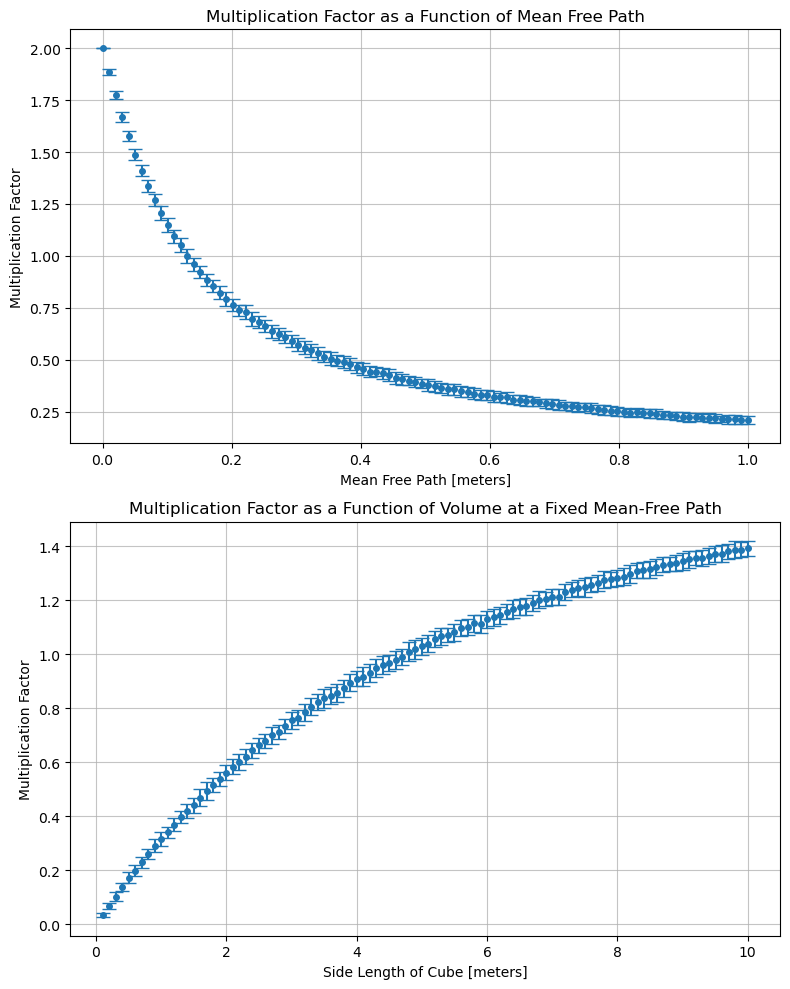

In [6]:
mult_fact_vv, lamda_vv, mean_lamda, std_lamda = lamda_variance(N, m_trials, 0.25)
mult_fact_sl, side_lengths, mean_sl, std_sl = volume_variance(N, m_trials, 2.5) 

plot_it2(lamda_vv, mean_lamda, std_lamda, side_lengths, mean_sl, std_sl)

_Figure 2: The top plot shows how the multiplication factors changes as a function of mean free path. The sidelength is fixed at 0.25 m. The data shows that there is an exponential relationship with the mean free path and the multiplication factor. Furthermore, the data shows that the multiplication factor increases as the mean free path decreases. The bottom plot shows how the multiplication factor changes as a function of volume of the sample. The sample is a cube. By varying the sidelength of the cube, the volume is varied. The mean free path is fixed at $\lambda = 2.5m$. The data shows that increasing the volume has notable affect on the multiplication factor. There seems to be a volume dependence on the multiplication factor. The data also shows a logarithmic relationship between the variance in volume and the multiplication factor._

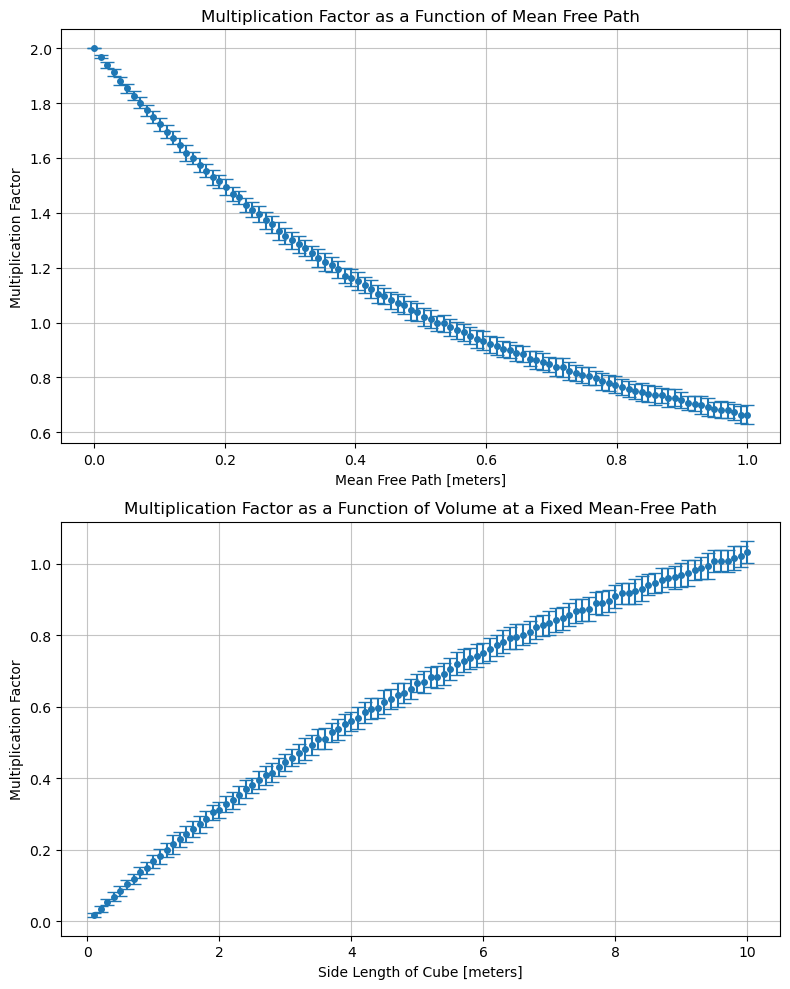

In [7]:
mult_fact_vv, lamda_vv, mean_lamda, std_lamda = lamda_variance(N, m_trials, 1)
mult_fact_sl, side_lengths, mean_sl, std_sl = volume_variance(N, m_trials, 5) 

plot_it2(lamda_vv, mean_lamda, std_lamda, side_lengths, mean_sl, std_sl)

_Figure 3: The top plot shows how the multiplication factors changes as a function of mean free path. The sidelength is fixed at 1 m. The data shows that there is an exponential relationship with the mean free path and the multiplication factor. Furthermore, the data shows that the multiplication factor increases as the mean free path decreases. The data is beginning, compared to the other plots, to look less like an exponential decay curve and more like a linear function. The bottom plot shows how the multiplication factor changes as a function of volume of the sample. The sample is a cube. By varying the sidelength of the cube, the volume is varied. The mean free path is fixed at $\lambda = 5 m$. The data shows that increasing the volume has notable affect on the multiplication factor. The data also shows a logarithmic relationship between the variance in volume and the multiplication factor. There seems to be a volume dependence on the multiplication factor. The data is beginning, compared to the other plots, to look less like an exponential decay curve and more like a linear function._

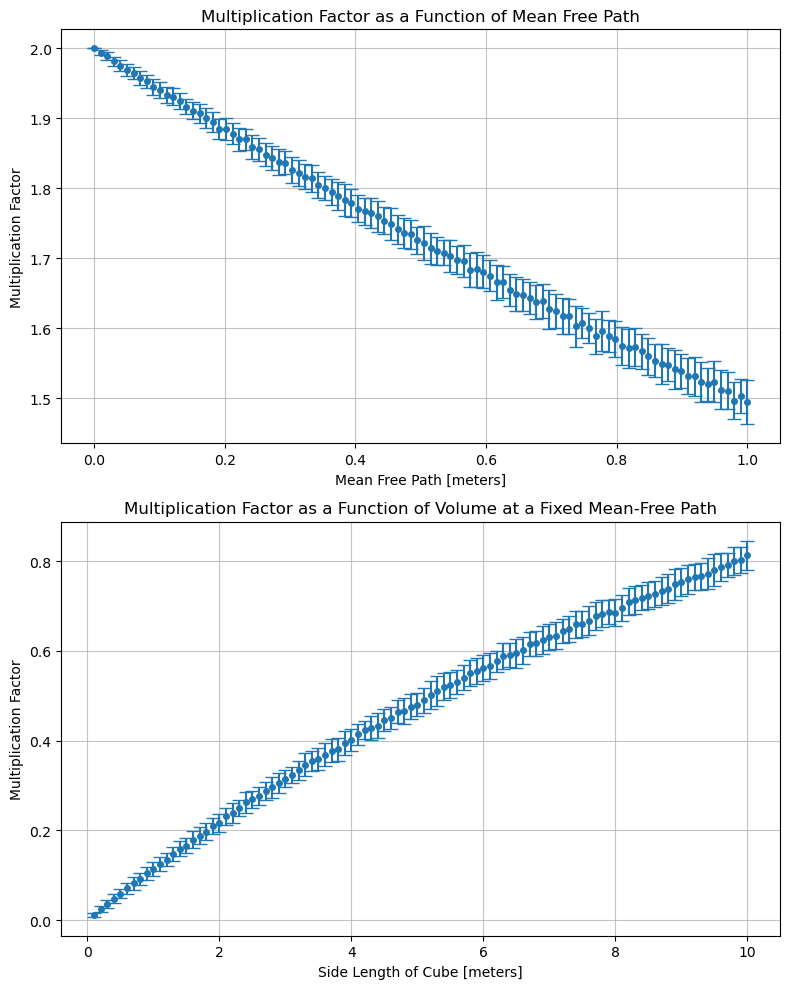

In [8]:
mult_fact_vv, lamda_vv, mean_lamda, std_lamda = lamda_variance(N, m_trials, 5)
mult_fact_sl, side_lengths, mean_sl, std_sl = volume_variance(N, m_trials, 7.5) 

plot_it2(lamda_vv, mean_lamda, std_lamda, side_lengths, mean_sl, std_sl)

_Figure 4: The top plot shows how the multiplication factors changes as a function of mean free path. The sidelength is fixed at 5 m. The data shows that there is an exponential relationship with the mean free path and the multiplication factor. Furthermore, the data shows that the multiplication factor increases as the mean free path decreases. The data is beginning, compared to the other plots, to look less like an exponential decay curve and more like a linear function. The bottom plot shows how the multiplication factor changes as a function of volume of the sample. The sample is a cube. By varying the sidelength of the cube, the volume is varied. The mean free path is fixed at $\lambda = 7.5 m$. The data shows that increasing the volume has notable affect on the multiplication factor. There seems to be a volume dependence on the multiplication factor. The data is beginning, compared to the other plots, to look less like an exponential decay curve and more like a linear function._

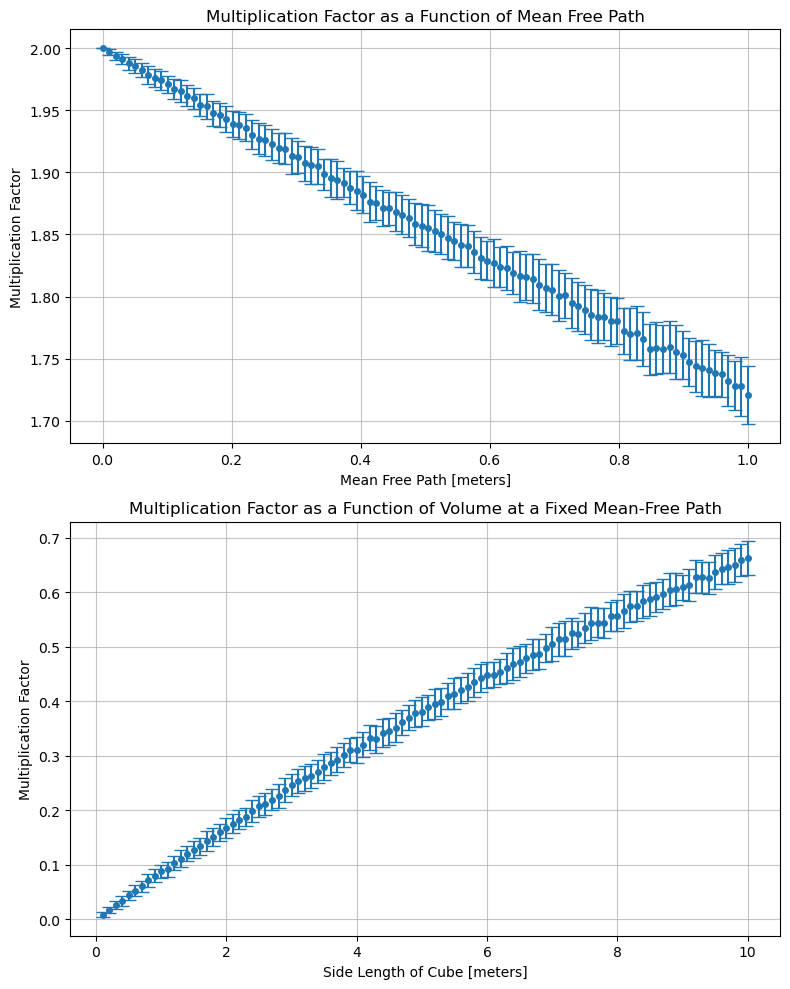

In [9]:
mult_fact_vv, lamda_vv, mean_lamda, std_lamda = lamda_variance(N, m_trials, 10)
mult_fact_sl, side_lengths, mean_sl, std_sl = volume_variance(N, m_trials, 10) 

plot_it2(lamda_vv, mean_lamda, std_lamda, side_lengths, mean_sl, std_sl)

_Figure 5: The top plot shows how the multiplication factors changes as a function of mean free path. The sidelength is fixed at 10 m. The data shows that there is an exponential relationship with the mean free path and the multiplication factor. Furthermore, the data shows that the multiplication factor increases as the mean free path decreases. The data looks more linear than exponential for the given sample size. The bottom plot shows how the multiplication factor changes as a function of volume of the sample. The sample is a cube. By varying the sidelength of the cube, the volume is varied. The mean free path is fixed at $\lambda = 10 m$. The data shows that increasing the volume has notable affect on the multiplication factor. There seems to be a volume dependence on the multiplication factor. The data also looks more linear that logarithmic for the given sample size._

# Synthesis and discussion

The research questions asked at the beginning of this investigation were:

1. How does varying the mean free path affect the multiplication factor
2. Assuming that the multiplication factor increases with a smaller mean free path, would increasing the volume have a considerable affect on the multiplication factor as the neutrons are already moving a a smaller distance on average?

To answer the first research question, the data from all the figures in the visualisations section show that there is a exponential relationship between the mean free path and the multiplication factor. The data shows that the multiplication factor does not increase past 2 and that a smaller mean free path yields a greater multiplication factor. This is a result that was expected. Figure 1 showed a varying mean free path with the sample having a fixed side length of 0.15 m and figure 5 showed a varying mean free path with the sample having a fixed side length of 10 m. The difference between the plots is that the relationship between the mean free path and the multiplication factor becomes more linear as the volume of the box increases. In figure 5, the top plot shows very little curvature. Experimentally, this means that varying the mean free path when the sample has a relatively huge volume has a smaller affect than varying the mean free path with the volume of the sample being relatively small. This goes to show that there is a correlation between the volume and the mean free path. All in all, there is an exponential relationship between varying the mean free path and the multiplication factor where the greatest multiplication factor that can be found is 2. 

To answer the seconds research question, varying the volume of the sample when the mean free path is close to 0 has negligible affect on the mulitplication factor. Figure 1 in the viasualisations section of this investigation shows a plot of the volume being varied at a mean free path set to $\lambda  = 1\times 10^{-15}m$. The plot showed that there was a negligible affect on the mutiplication factor when the volume was varied. When the sidelengths were set to be between 0 m and 2 m, the data points had huge uncertainties and tailed off from 0 showing a very slight logarithmic relationship. Thus, figures 2-5 were produced to figure out what was going on. Figure 2 showed a plot of the multiplication factor as a function of volume when the mean free path was set to $\lambda  = 1 m$. This plot showed a more noticeable logarthmic relationship between the multiplication factor and the volume. The plot looked like the plot of the multiplication factor as a function of mean free path reflected over the x-axis. This data was quite interesting as it may reveal some relationship between the mean free path and the volume of the sample. All in all, varying the volume of the sample when the mean free path is close to 0 has negligible affect on the mulitplication factor.

Some limitations of my simulation included not having functions to fit the data produced from the phase space diagrams. Having a function to show the relationship between the multiplication factor and the mean free path and the multiplication factor and the volume of the sample would provide me with a relationship between the multiplication factor and the volume. Another limitation of my simulation is not having a 3D plot to accurately show the relationship between the multiplication factor, volume, and mean free path. Going further, my next step would be to fit the data, find functions to represent the data, and find the relationship between the mean free path and the volume. I would then want to create a 3D plot showing the relationship between the mean free path, volume and multiplication factor. Finally, I would then include this notion of generations where I would have a single running simulation consisting of one trial where the new neutrons in appear at the locations of the fission reactions from the old generation. This would remove the randomness from the simulation and make it more realistic. it would aslo provide more insight as to how to optimize the fission reaction. 
